### Import all the necessary libraries

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Load the data from datasets

In [56]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [57]:
print(iris.feature_names)
print(iris['target_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [58]:
df= pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
df['class_labels']= iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
#For linear model
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Analize and visualize the data

In [61]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


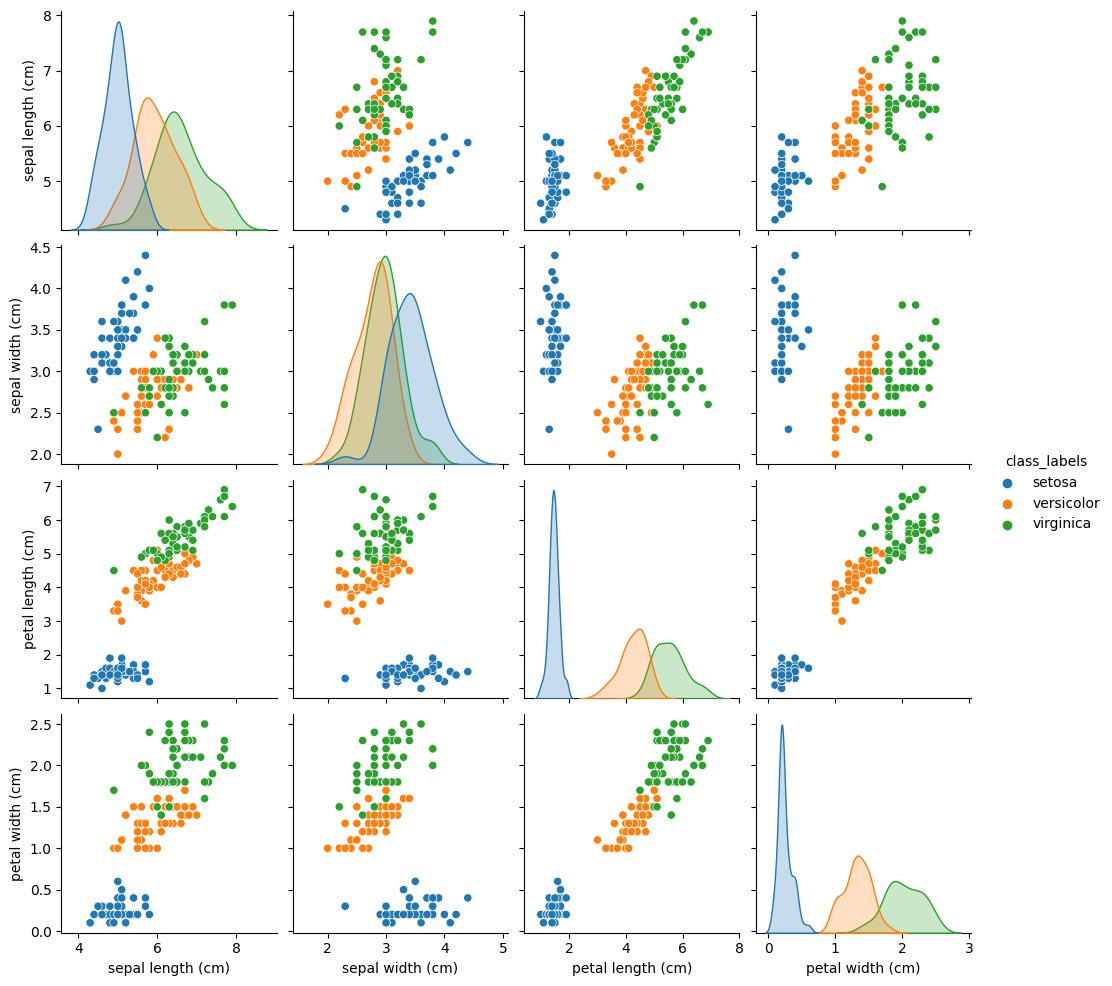

In [62]:
sns.pairplot(df, hue = 'class_labels')

### Separate features and target

In [63]:
data = df.values
x = data[:,0:4]
y= data[:, 4]
x[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2]], dtype=object)

### Get Train and test data

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

### Training the data

In [78]:
from sklearn.svm import SVC

svc = SVC()
svc_model= svc.fit(x_train, y_train)

### Evaluating the data

In [79]:
predicted_y = svc.predict(x_test)
svc_model.score(x_test, y_test)


0.9666666666666667

### detailed classification report
The classification report gives a detailed report of the prediction.

Precision defines the ratio of true positives to the sum of true positive and false positives.

Recall defines the ratio of true positive to the sum of true positive and false negative.

F1-score is the mean of precision and recall value.

Support is the number of actual occurrences of the class in the specified dataset.

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.86      0.92         7
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



### Testing The Model

In [81]:
X_new = np.array([[1, 1, 1, 0.2], [  4.9, 2, 8, 1 ], [  5.3, 5, 1, 1.9 ]])
predicted = svc_model.predict(X_new)
print("Prediction of the spices are :" , predicted)

Prediction of the spices are : ['setosa' 'virginica' 'setosa']


### Saving the model

In [82]:
#Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svc,f)

#Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
    
#Predict
model.predict(X_new)

array(['setosa', 'virginica', 'setosa'], dtype=object)

## Using Other Models

In [83]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)
print(y_pred1)
from sklearn import metrics
score1 = metrics.accuracy_score(y_pred1 , y_test)
print('Accuracy:',score1)

['setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica']
Accuracy: 0.9666666666666667


In [84]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix , classification_report
confusion_mat = confusion_matrix(y_test ,y_pred1)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(y_test ,y_pred1))

Confusion matrix: 
 [[11  0  0]
 [ 0  6  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.86      0.92         7
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [85]:
#Using Support Vector
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

from sklearn.metrics import accuracy_score
score2 = metrics.accuracy_score(y_pred2 , y_test)
print('Accuracy:',score2)

Accuracy: 0.9666666666666667


In [86]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred3 = knn.predict(x_test)

from sklearn.metrics import accuracy_score
score3 = metrics.accuracy_score(y_pred3 , y_test)
print('Accuracy:',score3)

Accuracy: 1.0


In [87]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred4 = nb.predict(x_test)

from sklearn.metrics import accuracy_score
score4 = metrics.accuracy_score(y_pred4 , y_test)
print('Accuracy:',score4)

Accuracy: 0.9666666666666667


In [88]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=7)
tree.fit(x_train,y_train)
y_pred5 = tree.predict(x_test)

from sklearn.metrics import accuracy_score
score5 = metrics.accuracy_score(y_pred5 , y_test)
print('Accuracy:',score5)

Accuracy: 0.9666666666666667


In [89]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [score1, score2, score3, score4, score5]})
results

,Model,Score
0,Logistic Regression,0.966667
1,Support Vector Machines,0.966667
2,Naive Bayes,1.000000
3,KNN,0.966667
4,Decision Tree,0.966667


## Hence, i will use Naive Bayes.